<div class="alert alert-block alert-success">
    
# FIT5196 Task 3 in Assessment 1
#### Student Name 1: Animesh Dubey
#### Student ID: 33758484
#### Student Name 2: Ashwin Gururaj
#### Student ID: 33921199

Date: 16 Aug 2024


Environment: Python 3.11.5

Libraries used:
* nltk
* collections
* os
* json
* pandas
* re
* numpy
* datetime
* matplotlib.pyplot
* seaborn
* wordcloud

    
</div>

## Import Libraries and Set Up File Paths

In [1]:
# Import necessary libraries for data processing, visualization, and natural language tasks:
import re
import pandas as pd
import numpy as np
import json
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import time
from nltk.corpus import stopwords, words
import nltk
from collections import Counter

# Set up file paths based on the script's directory
script_dir = os.getcwd()
csv_output_path = os.path.join(script_dir, 'task1_100.csv')
json_output_path = os.path.join(script_dir, 'task1_100.json')
metedata_json_path = os.path.join(script_dir, 'meta-California.json')

In this first step, we import all the necessary libraries that will be used throughout the analysis.<br>

re: for regular expressions to handle pattern matching and text extraction.<br>
pandas: for data manipulation and analysis using DataFrames.<br>
numpy: for numerical operations and efficient array handling.<br>
json: for loading and handling JSON data.<br>
os: for interacting with the operating system, such as file handling.<br>
datetime: for working with date and time data formats.<br>
matplotlib.pyplot: for creating static visualizations and plots.<br>
seaborn: for enhanced statistical data visualization based on Matplotlib.<br>
wordcloud: for generating word cloud visualizations from text data.<br>
time: for handling time-related functions, such as measuring execution time.<br>
nltk: for natural language processing tasks, such as tokenization and stopwords.<br>
collections.Counter: for counting frequencies of elements in collections.<br>
math.pi: for mathematical operations.<br>
plotly.express: for creating interactive plots.<br>

Setting up the file paths is crucial as it ensures that our script can dynamically locate the necessary data files (csv, json) regardless of where the script is run. This setup allows us to seamlessly load and process the data in the subsequent steps.


##  Load and Inspect CSV Data

In [2]:
# Load the output CSV data and display initial rows and summary
csv_output = pd.read_csv(csv_output_path)

# Check first few rows of output CSV data file
print("First few rows of the CSV dataset:")
print(csv_output.head())

# Summary statistics of output CSV data file
print("\nSummary statistics of the CSV dataset:")
print(csv_output.describe())

# Check null values and datatypes for dataset
print("\nData types and null values in the CSV dataset:")
print(csv_output.info())

First few rows of the CSV dataset:
                                  gmapID  review_count  review_text_count  \
0  0x52a564135eb23007:0x2eecd26a8239f115          1155                531   
1  0x54d157043c2dce1f:0x49169be277058a98           368                197   
2  0x54d28bc6f76e861b:0x480d662d75f7fb7d            78                 39   
3  0x54d2ea2c772d66c1:0xcd55c94ed7e4fd28            78                 43   
4  0x54d3ffe424e6fd95:0x7600a4d43dd2dea8           126                 46   

   response_count  
0               0  
1               0  
2               0  
3               3  
4               0  

Summary statistics of the CSV dataset:
       review_count  review_text_count  response_count
count    176.000000         176.000000      176.000000
mean     272.414773         141.761364       32.579545
std      653.910150         307.657657      100.369286
min       52.000000          15.000000        0.000000
25%       73.750000          36.750000        0.000000
50%       96

In this step, we load the CSV file containing the structured data output. The first step in any data analysis is to inspect the dataset to understand its structure, content, and quality. We begin by displaying the first few rows of the dataset to get an initial look at the data. This helps us verify that the data has been loaded correctly and gives us a quick snapshot of the type of information available. Next, we generate summary statistics, which provide insights into the central tendency, dispersion, and shape of the data distribution for numeric variables. Additionally, the info() method gives us a concise summary of the dataset, including the data types of each column and the presence of any missing values. This information is essential for identifying potential issues (such as missing or incorrect data types) that may need to be addressed before proceeding with the analysis.

## Load and Inspect JSON Data

In [3]:
# Load the output JSON file
with open(json_output_path, 'r', encoding='utf-8') as json_file:
    json_data = json.load(json_file)

# Check key features and variables of output JSON file
sample_keys = list(json_data.keys())[:3]
for key in sample_keys:
    print(f"gmapID: {key}")
    print(json_data[key])
    print("\n")

gmapID: 0x52a564135eb23007:0x2eecd26a8239f115
{'reviews': [{'user_id': '103249380695325754089', 'time': '2021-03-30 06:05:01', 'review_rating': '3', 'review_text': "big difference from the day and night crews. the night crew seems to have more product knowledge than the day crew. they also are doing done stocking and still help customers.  the day crew which is stocking all day , surprisingly doesn't have product knowledge it seems. it's not that they don't know and then point you the wrong direction purposely, they just want to get done and leave and don't want to bother with that customer service stuff.  it's called multitasking people....", 'If_pic': 'N', 'pic_dim': [], 'If_response': 'N'}, {'user_id': '102872252113989344071', 'time': '2020-11-01 18:39:48', 'review_rating': '5', 'review_text': 'my wife and i love this place! the staff is good too', 'If_pic': 'Y', 'pic_dim': [['150', '150'], ['150', '150'], ['150', '150']], 'If_response': 'N'}, {'user_id': '104245578941153418830', 't

This step is focused on loading and inspecting the JSON file, which contains more complex, unstructured data. JSON is a common format for representing nested data structures, often used for storing and exchanging data between a server and a client. By loading the JSON file, we can access detailed information such as individual reviews, ratings, and other metadata associated with each gmapID. To ensure that the data is loaded correctly and to understand its structure, we print out a sample of the data. This involves selecting a few keys (gmapIDs) from the JSON object and displaying the corresponding data. This step is crucial as it helps us identify the structure and content of the JSON data, which is necessary for correctly parsing and analyzing it later. Understanding the structure of this data will guide how we extract relevant information and integrate it with other datasets.

## Convert JSON Data to DataFrame

In [4]:
# Converting JSON data into dataframe
records = []
for gmapID, details in json_data.items():
    for review in details['reviews']:
        try:
            review_rating = int(review.get('review_rating')) if review.get('review_rating') is not None else None
        except ValueError:
            review_rating = None 
        records.append({
            'gmapID': gmapID,
            'user_id': review.get('user_id'),
            'review_text': review.get('review_text'),
            'review_rating': review_rating,
            'If_pic': review.get('If_pic'),
            'If_response': review.get('If_response'),
            'time': review.get('time')
        })

df = pd.DataFrame(records)

In this cell, we convert the complex, nested JSON data into a flat pandas DataFrame, which is easier to manipulate and analyze. JSON data often contains hierarchical information, where each gmapID may have multiple associated reviews, each with its own set of attributes (e.g., user_id, review_text, review_rating). By iterating through each gmapID and its corresponding reviews, we extract relevant details and store them as individual records in a list of dictionaries. Each dictionary corresponds to a single review and includes all the relevant fields. This list is then converted into a DataFrame, a powerful tabular data structure provided by pandas. Converting JSON data to a DataFrame is a crucial step because it allows us to leverage pandas' extensive data manipulation capabilities, making it easier to perform operations like filtering, grouping, and aggregating data in subsequent analysis steps.

##  Download and Prepare NLTK Resources

In [5]:
# Download stopwords and English words
nltk.download('stopwords')
nltk.download('words')

# Filter common stopwords and non-English words
custom_stopwords = set(stopwords.words('english'))
valid_english_words = set(words.words())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashwingururaj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/ashwingururaj/nltk_data...
[nltk_data]   Package words is already up-to-date!


In this step, we prepare resources from the Natural Language Toolkit (NLTK), a leading platform for building Python programs to work with human language data. First, we download the stopwords and a list of valid English words. Stopwords are commonly used words (such as "the", "and", "is") that often carry less meaning and are usually removed during text preprocessing to focus on the more meaningful words. 

## Most Common Words in Review Texts

In [6]:
# Finding most common words occuring in review texts
all_words = ' '.join(df['review_text'].dropna()).lower().split()

# Filter out 'None' values, standard stopwords, and non-English words from the list of words
all_words = [word for word in all_words if word != 'none' and word not in custom_stopwords and word in valid_english_words]

# Calculate the frequency of each word
vocab_freq_distribution = Counter(all_words)
most_common_words = vocab_freq_distribution.most_common(20)

# Convert the most common words into a pandas Series for easier plotting
vocab_series = pd.Series(dict(most_common_words))

Here, we delve into the textual content of the reviews to uncover the most common words used by customers. The process begins by concatenating all the review texts into a single large string, converting it to lowercase to ensure consistency, and then splitting it into individual words (tokens). We then filter out unwanted tokens, including the word "none" (which might appear as a placeholder in missing data), stopwords, and any tokens that are not valid English words. This filtering step helps in retaining only the meaningful and relevant words. The next step involves calculating the frequency of each word using the Counter class from the collections module, which provides a simple way to tally occurrences of each word. Finally, we identify the 20 most common words and convert them into a pandas Series, which is a one-dimensional array-like object that is well-suited for creating visualizations in the upcoming steps. Analyzing the most common words in review texts helps us understand the recurring themes or topics mentioned by customers, which can provide valuable insights into customer concerns, preferences, or experiences.

## Visualize Most Common Words

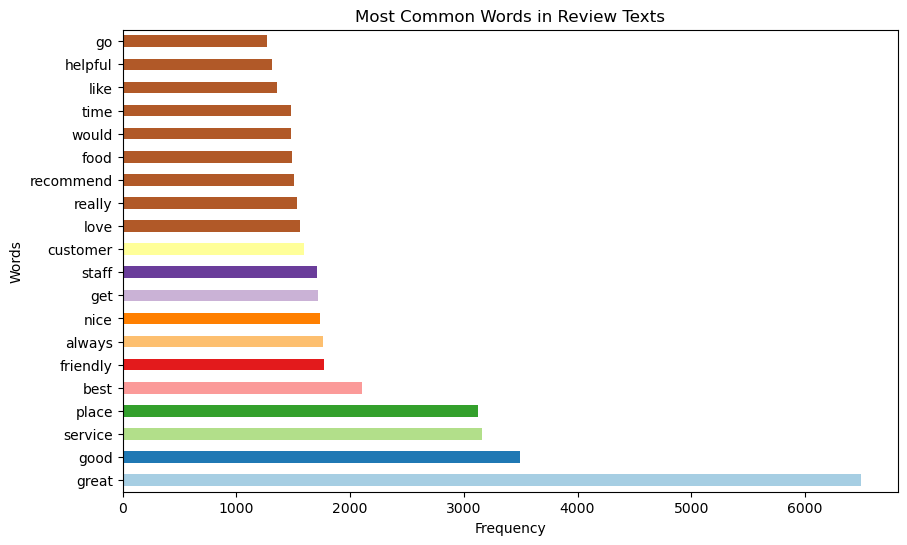

In [7]:
# Define a color palette for bar plot visualization
colors = plt.cm.Paired(range(len(vocab_series)))

# Create a bar plot for the top 20 most common words in review texts
plt.figure(figsize=(10, 6))
bars = vocab_series.plot(kind='barh', color=colors)
plt.title('Most Common Words in Review Texts')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

This focuses on visualizing the top 20 most common words found in the review texts. Visualization is a crucial part of data analysis as it allows us to see patterns and trends that might not be immediately apparent from raw data. Here, we use a horizontal bar chart (barh) to display the frequency of each of these common words. The plt.cm.Paired color palette is used to make the bars visually distinct and engaging. The horizontal orientation is particularly effective for displaying text labels

### Insights from the plot

The horizontal bar plot highlights the significance of positive sentiment and excellent service in terms of customer reviews. High frequency of words like "great", "good", "nice" etc. highlights the strong sound of positive feedback. Fusthermore, words like "service", "staff", "helpful" and "friendly" indicates that customer satisfaction plays a very important role in developing customer experiences and perceptions. Moreover, presence of words like "food", "recommend", and "place" suggests that many of the reviews are related to Food and Beverage industry. These views provide a pure presence of prominent customer satisfaction and not only that this also suggests that people tend to recommend the businesses to others, leading to a high percentage of repeat visits and word of mouth promotion.

## Generate Word Cloud

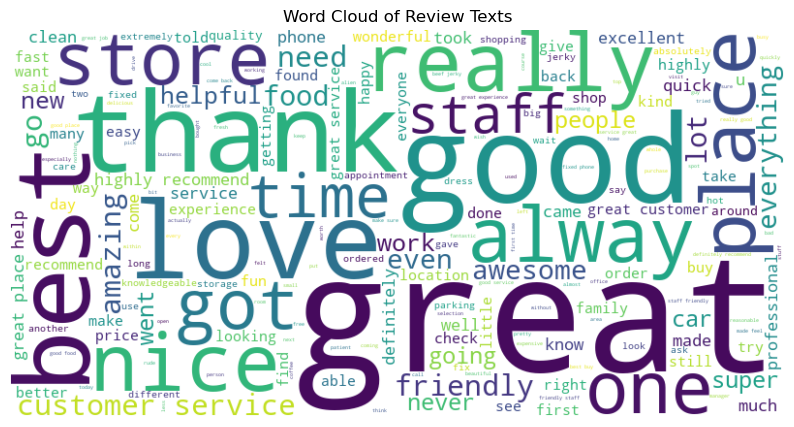

In [8]:
# Generating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Texts')
plt.show()

In this step, the logic focuses on visualizing the frequency of words within the review texts using a word cloud, a popular text visualization tool. The WordCloud class from the wordcloud library is utilized to generate a graphical representation where the size of each word corresponds to its frequency in the dataset. The code first concatenates all the filtered words into a single string, which is then passed to the generate method of WordCloud. The imshow function from matplotlib is used to display the word cloud image, with the interpolation='bilinear' argument ensuring smooth rendering. This visualization helps in quickly identifying the most prominent terms in the dataset, providing an intuitive understanding of the key themes or topics discussed in the reviews.

### Insights from the WordCloud

The word cloud depicts that customer reviews are prominently leaning on positive, with a strong emphasis on excellent service and customer experience. Words like "great", "good", "love", "best" highligh overall customer satisfaction and this also expresses a strong loyalty expression with a prominent word of mouth promotion.

##  Review Count by Year


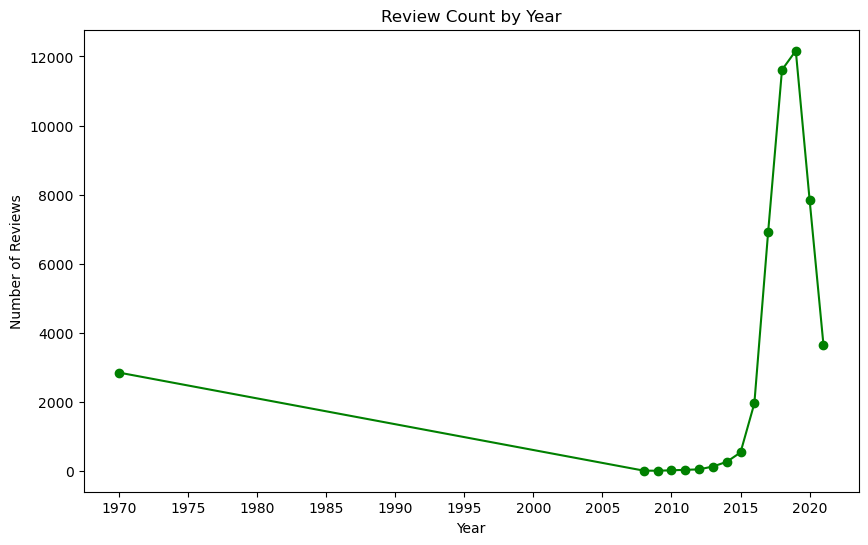

In [9]:
# Extract the 'year' from the 'time' column after converting it to datetime format
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['year'] = df['time'].dt.year

# Group the data by year and count the number of reviews for each year
yearly_review_data = df.groupby('year').size()

# Remove years that have zero reviews to focus on relevant data
yearly_review_data = yearly_review_data[yearly_review_data > 0]

# Plot the trend of review counts over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_review_data.index, yearly_review_data.values, color='green', marker='o')
plt.title('Review Count by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')

# Set x-axis ticks at a 5-year interval for readability
plt.xticks(ticks=range(int(yearly_review_data.index.min()), int(yearly_review_data.index.max()) + 1, 5))

plt.show()

The code first converts the 'time' column to a datetime format, allowing for efficient extraction of the year component using dt.year. The reviews are then aggregated by year using groupby and size to count the number of reviews per year. The code excludes years with zero reviews to ensure a meaningful trend analysis. The trend is visualized using a line plot, which effectively shows the changes in review activity over time. The inclusion of markers (marker='o') on the plot helps in highlighting the exact points on the trend line, making it easier to identify significant fluctuations or patterns.

### Insights of trend over time analysis

The evolution of customer reviews over the past five decades reveals a fascinating trajectory. In the early years, from around 1970 to 2010, review numbers remained relatively low, reflecting the limited digital engagement of that era. However, the landscape transformed dramatically post-2010, with a steep upward curve in review volume. This surge coincided with the proliferation of online review platforms and the increasing digitalization of consumer behavior. The pinnacle of this growth occurred around 2019, marking a period of unprecedented customer engagement and feedback. However, this upward momentum came to an abrupt halt in 2020-2021. The sudden downturn in review activity during these years can be largely attributed to the global COVID-19 pandemic.

The pandemic's effects were far-reaching, particularly in the service sector. Widespread business closures and stringent restrictions led to a significant reduction in customer interactions. This decrease in face-to-face encounters naturally resulted in fewer opportunities for customers to form and share opinions about their experiences.

As businesses adapt to post-pandemic realities, we may see a resurgence in review activity, albeit potentially in new forms that reflect changed consumer habits and expectations

## Average Rating by Review Length

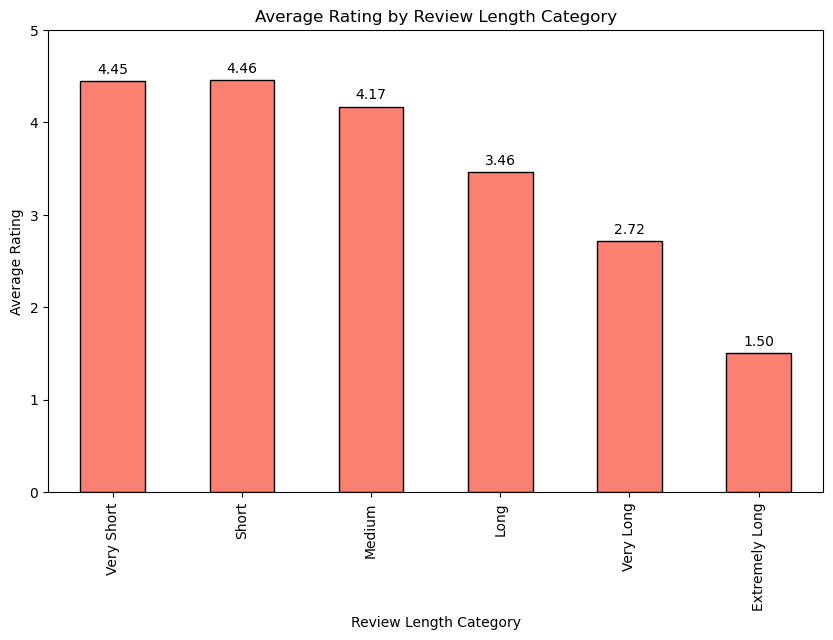

In [10]:
# Calculate the length of each review text based on the number of words
df['review_length'] = df['review_text'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

# Categorize reviews into different length categories (e.g., Short, Medium, Long)
bins = [0, 20, 50, 100, 200, 500, float('inf')]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long', 'Extremely Long']
df['length_category'] = pd.cut(df['review_length'], bins=bins, labels=labels)

# Calculate the average rating for each review length category
review_length_based_avg_rating = df.groupby('length_category')['review_rating'].mean()

# Plot the average ratings by review length category
plt.figure(figsize=(10, 6))
review_length_based_avg_rating.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Average Rating by Review Length Category')
plt.xlabel('Review Length Category')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
# Add text annotations to the bar plot for clarity
for i, v in enumerate(review_length_based_avg_rating):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')
plt.show()

The review length is calculated by counting the number of words in each review using a lambda function within apply. Reviews are then categorized into different length bins using pd.cut, which groups the reviews into predefined ranges (bins) such as 'Very Short', 'Medium', 'Long', etc. The groupby function is used to calculate the mean rating for each length category, providing insights into whether longer or shorter reviews tend to have higher or lower ratings. The results are visualized with a bar plot, which is well-suited for comparing average ratings across discrete categories. The use of text annotations on the bars (plt.text) adds clarity by displaying the exact average rating for each category.

### Insights about average rating based on review length

Short Reviews Tend to Be More Positive: When people leave "Very Short" or "Short" reviews, they often give higher ratings, which suggests they’re generally happy with their experience.

Longer Reviews Are More Critical: As the length of the review increases, the ratings drop significantly. "Extremely Long" reviews, in particular, have the lowest average rating of 1.5, indicating that detailed reviews are often more critical.

Consumer Review Preferences: People usually write shorter reviews when they’re satisfied, while longer reviews often indicate dissatisfaction or specific concerns. This trend shows that brief reviews are typically tied to positive experiences, whereas longer reviews tend to focus on what went wrong or could be improved.

## Load and Inspect California Metadata

In [11]:
# Load the California metadata JSON file and convert it to a DataFrame
with open(metedata_json_path, 'r', encoding='utf-8') as metedata_json_file:
    metadata_California_data = [json.loads(line) for line in metedata_json_file]
    
# Converting the metadata dictionary to a DataFrame
metadata_df = pd.DataFrame(metadata_California_data)

# Preview the first few rows and get basic statistics of the metadata DataFram
print(metadata_df.head())

# Display the data types and check for missing values in the metadata
print("\nSummary statistics for metadata:")
print(metadata_df.describe())

# Checking for null values and datatypes in metadata
print("\nData types and missing values in metadata:")
print(metadata_df.info())

                            name  \
0                   City Textile   
1                   San Soo Dang   
2                   Nova Fabrics   
3               Nobel Textile Co   
4  Matrix International Textiles   

                                             address  \
0  City Textile, 3001 E Pico Blvd, Los Angeles, C...   
1  San Soo Dang, 761 S Vermont Ave, Los Angeles, ...   
2  Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...   
3  Nobel Textile Co, 719 E 9th St, Los Angeles, C...   
4  Matrix International Textiles, 1363 S Bonnie B...   

                                 gmap_id description   latitude   longitude  \
0  0x80c2c98c0e3c16fd:0x29ec8a728764fdf9        None  34.018891 -118.215290   
1  0x80c2c778e3b73d33:0xbdc58662a4a97d49        None  34.058092 -118.292130   
2   0x80c2c89923b27a41:0x32041559418d447        None  34.023669 -118.232930   
3  0x80c2c632f933b073:0xc31785961fe826a6        None  34.036694 -118.249421   
4  0x80c2cf163db6bc89:0x219484e2edbcfa41        Non

This step involves loading additional metadata related to California businesses from a JSON file and inspecting its contents. The initial inspection includes printing the first few rows (head) to get a sense of the data structure and running describe() to generate summary statistics that provide insights into the central tendency, variability, and distribution of numeric fields. Finally, info() is used to check the data types and identify any missing values. This step is critical for understanding the metadata and assessing its quality before integrating it with the main dataset.

## Correlation and Matching gmapIDs in Metadata 

In [12]:
# Lookup for unique gmapIDs in metadata_df
unique_gmapIDs = metadata_df['gmap_id'].nunique()
total_gmapIDs = metadata_df['gmap_id'].count()

print(f"\nTotal gmapID entries in metadata: {total_gmapIDs}")
print(f"Unique gmapID entries in metadata: {unique_gmapIDs}")

# Check for any relationships, such as correlations, between 'avg_rating' and 'num_of_reviews' in the metadata
if 'avg_rating' in metadata_df.columns and 'num_of_reviews' in metadata_df.columns:
    print("\nCorrelation between average rating and number of reviews:")
    print(metadata_df[['avg_rating', 'num_of_reviews']].corr())

# Check if 'gmap_id' is present and can be used to join with the main dataset
if 'gmap_id' in metadata_df.columns:
    print(f"\ngmap_id is present and can be used to join with the main dataset.")
else:
    print(f"\ngmap_id is not present in the metadata; joining with the main dataset might be challenging.")

# Determine how many 'gmapIDs' in the metadata match those in the main dataset
main_gmapIDs = set(df['gmapID'].unique())
meta_gmap_ids = set(metadata_df['gmap_id'].unique())

matching_gmapIDs = main_gmapIDs.intersection(meta_gmap_ids)
non_matching_gmapIDs = main_gmapIDs.difference(meta_gmap_ids)

print(f"\nNumber of gmapIDs in the main dataset: {len(main_gmapIDs)}")
print(f"Number of gmapIDs in metadata that match the main dataset: {len(matching_gmapIDs)}")
print(f"Number of gmapIDs in the main dataset with no matching metadata: {len(non_matching_gmapIDs)}")

# Decision on whether to incorporate metadata based on the matching gmapIDs
if len(matching_gmapIDs) / len(main_gmapIDs) > 0.5:
    print("\nDecision: Incorporate the metadata into your analysis, as it covers a significant portion of your data.")
else:
    print("\nDecision: The metadata may be too sparse to incorporate effectively into the main analysis.")


Total gmapID entries in metadata: 515961
Unique gmapID entries in metadata: 513134

Correlation between average rating and number of reviews:
                avg_rating  num_of_reviews
avg_rating        1.000000        0.010777
num_of_reviews    0.010777        1.000000

gmap_id is present and can be used to join with the main dataset.

Number of gmapIDs in the main dataset: 176
Number of gmapIDs in metadata that match the main dataset: 176
Number of gmapIDs in the main dataset with no matching metadata: 0

Decision: Incorporate the metadata into your analysis, as it covers a significant portion of your data.


This cell's logic is centered on understanding the overlap and correlation between the main dataset and the California metadata. The first part of the logic checks for uniqueness and total counts of gmapID entries in the metadata, which helps gauge the scope and coverage of the metadata. Next, the correlation between the average rating (avg_rating) and the number of reviews (num_of_reviews) is calculated to see if there is a linear relationship between these two variables, which could provide insights into customer behavior or business performance. The logic also includes a comparison of gmapIDs between the main dataset and the metadata to identify how many businesses are covered in both datasets. The decision is based on the proportion of gmapIDs that match between the main dataset and the metadata. If the proportion of matching gmapIDs is greater than 50%, it suggests that the metadata covers a significant portion of the main dataset, making it worthwhile to integrate for enhanced insights. Conversely, if the overlap is minimal, the metadata might not add sufficient value and could be excluded to maintain focus and simplicity in the analysis.

## Exploding Categories based on Review Volume

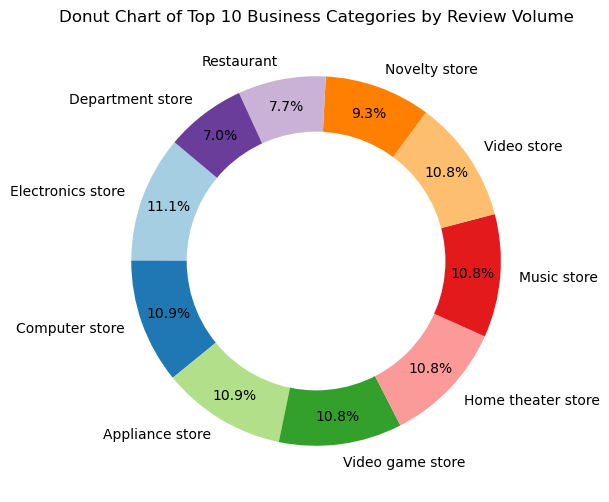

In [13]:
# Load the Metadata JSON File and convert it to a DataFrame
with open(metedata_json_path, 'r', encoding='utf-8') as metadata_file:
    metadata_records = [json.loads(line) for line in metadata_file]

metadata_df = pd.DataFrame(metadata_records)

# Merge the main dataset and metadata on 'gmapID' for further analysis
merged_df = pd.merge(csv_output, metadata_df, left_on='gmapID', right_on='gmap_id', how='inner')

# Expand the 'category' column to individual rows for more granular analysis
merged_df_exploded = merged_df.explode('category')

# Group data by 'category' and sum up the review counts to analyze popularity
review_volume_by_category = merged_df_exploded.groupby('category')['review_count'].sum().sort_values(ascending=False)

top_categories = review_volume_by_category.head(10)

# Plotting the donut chart
plt.figure(figsize=(10, 6))
plt.pie(top_categories, labels=top_categories.index, colors=plt.cm.Paired.colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Donut Chart of Top 10 Business Categories by Review Volume')
plt.show()

This part of the code starts by combining the main dataset with the extra information dataset using the Google Map ID. It only keeps the information that is in both datasets to make sure everything is consistent. Then, it separates the categories for each business because a business can be in many categories. The code groups the data by category and counts how many reviews each category has. It then sorts these numbers from highest to lowest to find the most popular categories. To show this information, a donut chart is made. This chart shows the proportion of reviews for the top 10 categories, which helps us understand how many businesses are in each category and which types of businesses are reviewed the most.

### Insights about most popular business categories in terms of reviews

1. Electronics Stores Lead the Pack: Electronics stores receive the highest percentage of reviews (11.1%), indicating strong consumer interest in this category. This suggests that electronics products are particularly popular, or customers are more inclined to share their experiences, possibly due to the high value or technical nature of these purchases.

2. Balanced Review Distribution Among Key Categories: The review volumes for computer stores, appliance stores, and video game stores are closely matched, each holding around 10.8% to 10.9% of the total review share. This tight grouping highlights a competitive market where customers are engaging similarly across these categories, reflecting their importance in consumer purchasing decisions.

3. Restaurants Rank Lower Than Expected: Contrary to typical trends where restaurants often dominate review platforms, the restaurant category in this chart ranks lower with 7.7% of the reviews. This could suggest a shift in consumer focus towards other categories like electronics, or it could reflect a broader trend where consumers are diversifying their spending and review habits.

4. Growing Interest in Niche Markets: The novelty store category holds a significant 9.3% of the reviews, indicating a strong consumer interest in unique or specialized products. This trend suggests that consumers are increasingly drawn to niche shopping experiences that offer something different from the mainstream.

The chart reveals a strong consumer focus on electronics and entertainment-related businesses, with electronics stores leading in review volume. There is also a notable balance in consumer engagement across several key categories, reflecting a competitive marketplace. Meanwhile, the lower-than-expected ranking of restaurants and the substantial interest in novelty stores suggest shifts in consumer behavior towards specialized products and experiences.

## Mapping Price Levels to Accessibility Features

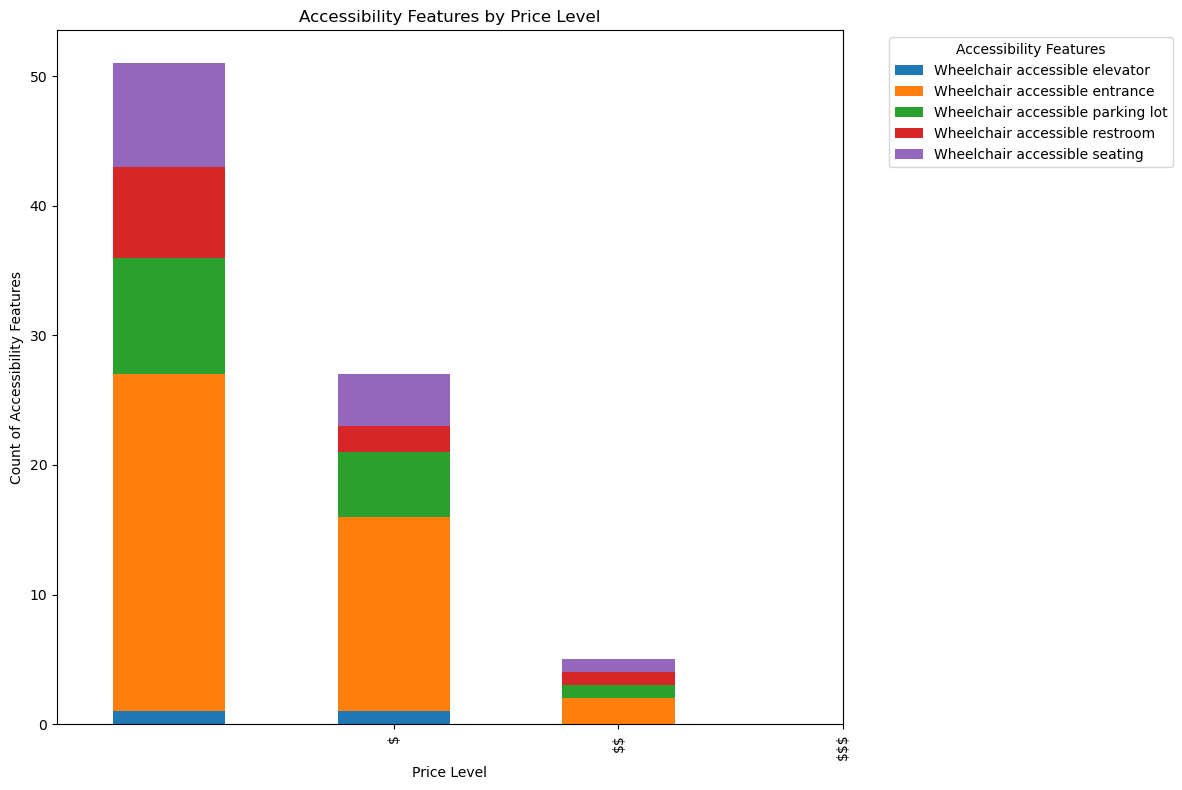

In [14]:
# Convert price levels into integer categories for easier analysis
price_mapping = {'$': 1, '$$': 2, '$$$': 3}
merged_df['price_level'] = merged_df['price'].map(price_mapping)

# Function to extract accessibility features from the 'Misc' column
def accessibility_feature_extraction(misc):
    """
    Description: 
        Extracts accessibility features from the 'Misc' field, which is expected to be a dictionary. 
        The function checks if the 'Misc' field contains a key named 'Accessibility' and returns its value. 
        If the key is not present or if 'Misc' is not a dictionary, it returns an empty list.
    Arguments:
        misc (dict): A dictionary containing various metadata. It may include an 'Accessibility' key that holds a list of accessibility features. 
                    If 'misc' is not a dictionary or does not contain the 'Accessibility' key, the function handles it gracefully.
    Returns:
        list: A list of accessibility features if the 'Accessibility' key exists in the 'misc' dictionary.
            Returns an empty list if 'Accessibility' is not found or if the input is not a dictionary.
    """
    if isinstance(misc, dict):
        return misc.get('Accessibility', [])
    return []

# Extract unique accessibility features and map them to the corresponding price level
merged_df['accessibility_features'] = merged_df['MISC'].apply(accessibility_feature_extraction)

# Initialize a list to store data for accessibility features by price level
data = []

# Iterate through each row to collect price level and associated accessibility feature
for index, row in merged_df.iterrows():
    price_level = row['price_level']
    for feature in row['accessibility_features']:
        data.append({'price_level': price_level, 'feature': feature})

# Create a DataFrame from the collected data
accessibility_df = pd.DataFrame(data)

# Group by price level and feature, and count the occurrences
price_level_feature_count = accessibility_df.groupby(['price_level', 'feature']).size().unstack(fill_value=0)

# Set x-ticks and labels while escaping special characters to avoid interpretation as mat
price_level_feature_count.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set the x-ticks and labels, escaping the special characters to avoid interpreteting as math
plt.xticks(ticks=range(1, len(price_mapping) + 1), labels=[r'\$'] + [r'\$\$'] + [r'\$\$\$'])

plt.title('Accessibility Features by Price Level')
plt.xlabel('Price Level')
plt.ylabel('Count of Accessibility Features')
plt.legend(title='Accessibility Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This part of the code looks at the relationship between how expensive businesses are and how accessible they are. The prices, which were originally symbols like $, $$, and $$$, are changed to numbers for easier analysis. The MISC column, which has different information about each business, is checked to find any information about accessibility. This information is important for understanding how businesses help customers with specific needs.

The code looks at each row in the combined dataset and maps the prices to the accessibility features. This information is then put into a new dataset called accessibility_df. This dataset is grouped by both price and feature to count how often each accessibility feature appears at each price level. A stacked bar chart is made to show this information. This chart helps us compare how often different accessibility features appear at different price levels. This analysis shows us if more expensive businesses tend to have more or better accessibility features, which is important for customers.

### Insights about Accessibility Features by Price Level

1. Higher Accessibility in Budget Businesses: Lower-priced businesses ($) prioritize accessibility, with the highest count of features like wheelchair-accessible entrances and parking lots, suggesting a focus on inclusivity.

2. Decreased Accessibility in Higher-End Businesses: As price levels increase, accessibility features drop significantly, with high-end businesses ($$$) offering minimal accommodations. This indicates a potential oversight or different focus on inclusivity in luxury markets.

3. Opportunity for Competitive Advantage: The lack of accessibility features in mid to high-end businesses represents a market opportunity. By enhancing accessibility, these businesses could attract a broader customer base and stand out in the market.

These insights suggest that while budget-friendly businesses lead in accessibility, there is room for improvement in higher-end sectors, where inclusivity could become a differentiator.

## Review Volume by Business State

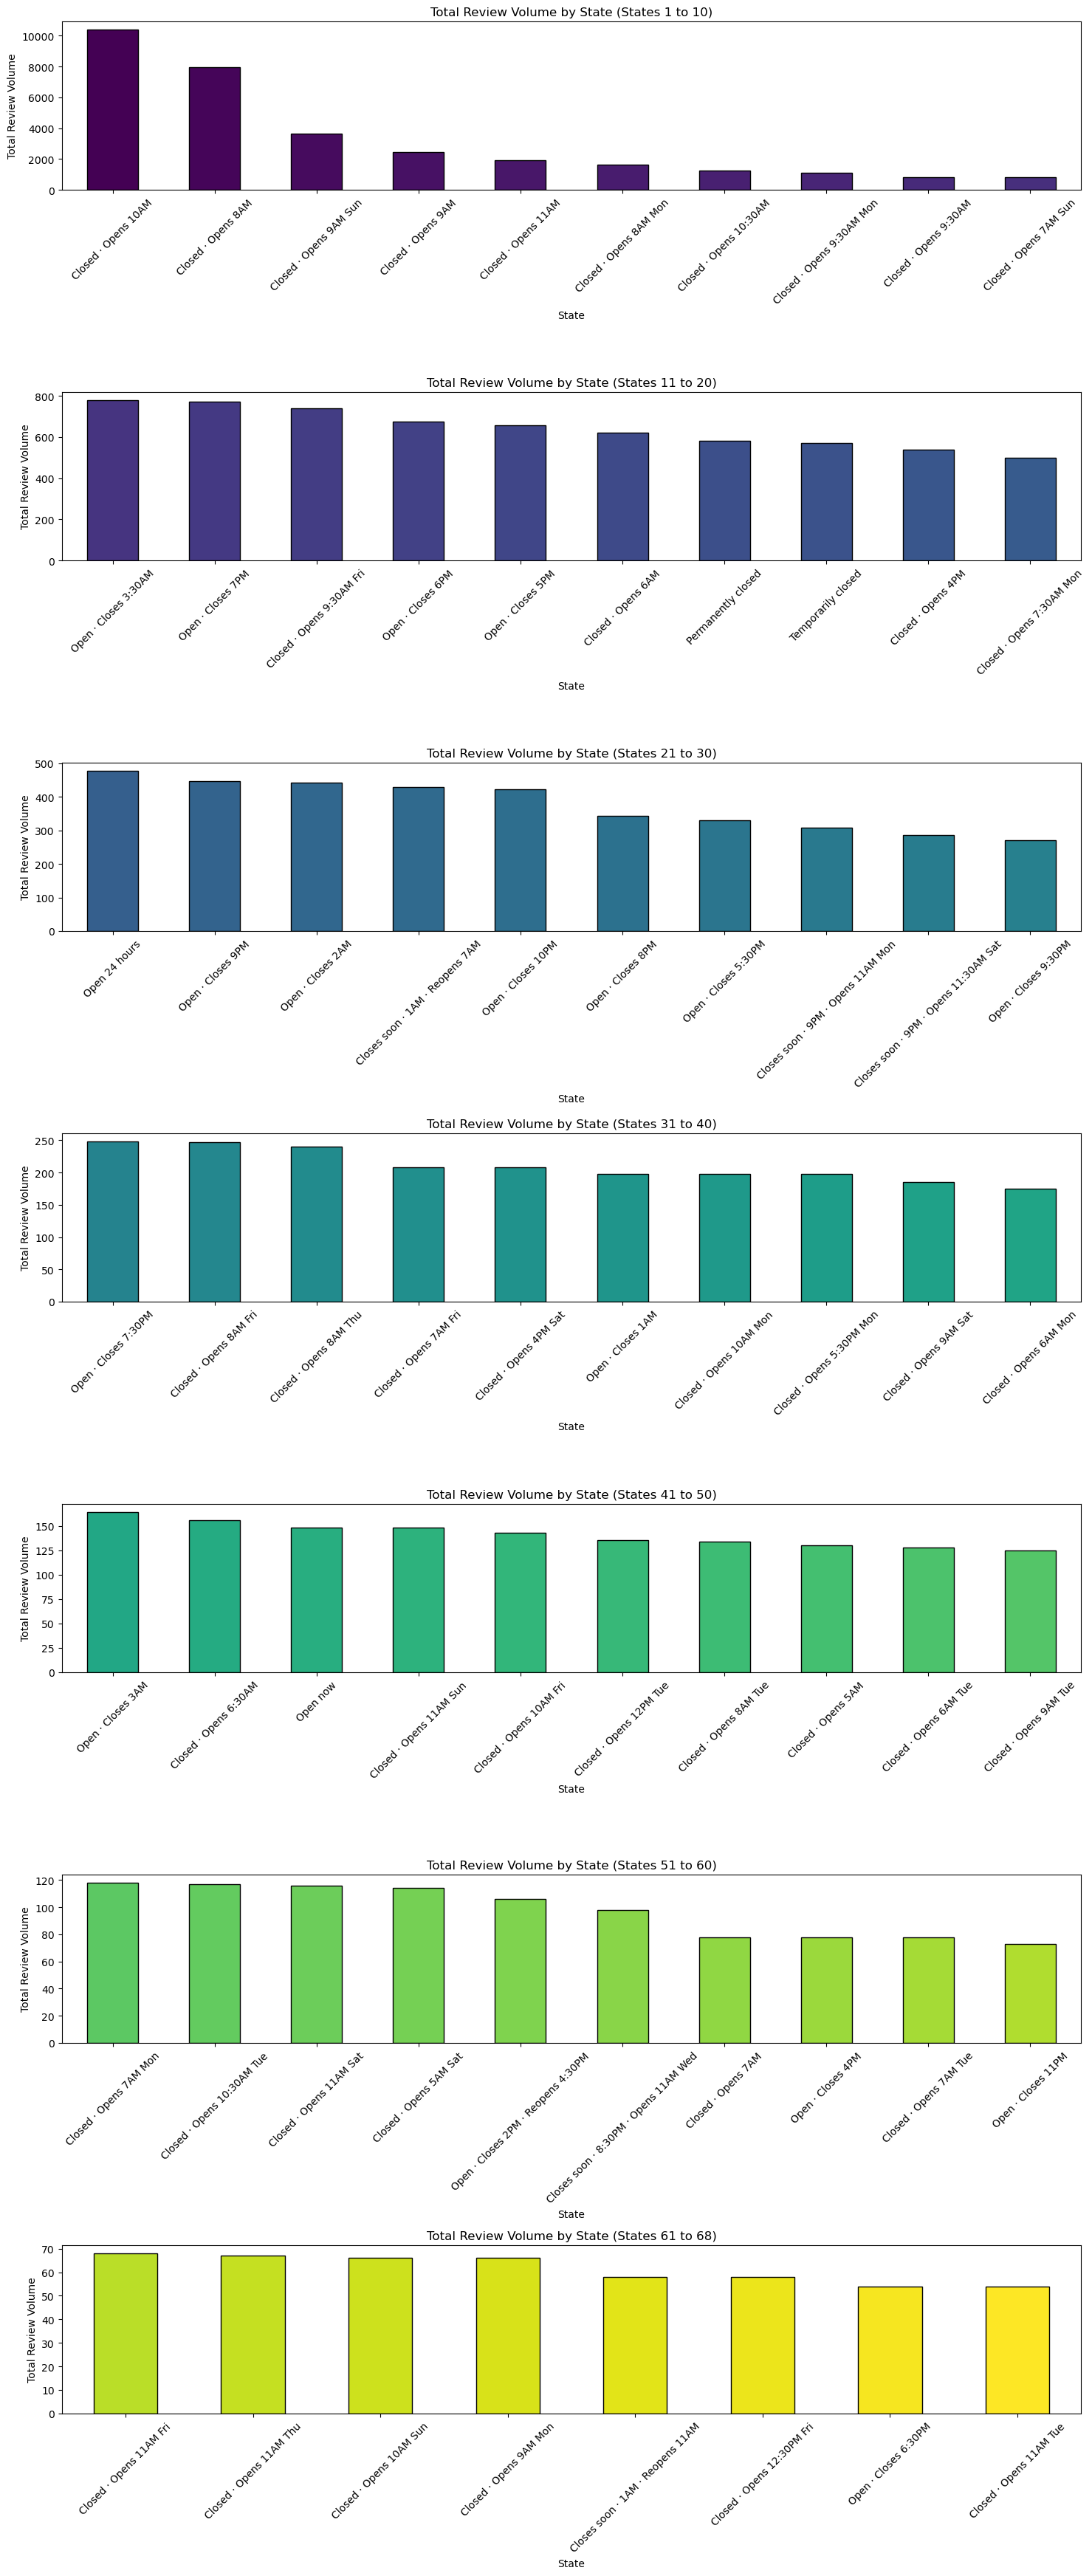

In [15]:
from math import pi

# Convert 'review_count' column to numeric format for analysis
merged_df['review_count'] = pd.to_numeric(merged_df['review_count'], errors='coerce')

# Groupby 'state' and calculate the total review count
business_state_review_distribution = merged_df.groupby('state')['review_count'].sum().sort_values(ascending=False)

colors = plt.cm.viridis(np.linspace(0, 1, len(business_state_review_distribution)))

# Determine the number of subplots needed based on the number of states
num_states = len(business_state_review_distribution)
states_per_plot = 10  # Adjust this number to control how many states per subplot
num_plots = (num_states + states_per_plot - 1) // states_per_plot

# Create subplots for plotting the review volume by state
fig, axes = plt.subplots(num_plots, 1, figsize=(15, num_plots * 5))

# Plot each group of states in a separate subplot
for i in range(num_plots):
    start_idx = i * states_per_plot
    end_idx = min((i + 1) * states_per_plot, num_states)
    
    subset = business_state_review_distribution[start_idx:end_idx]
    subset.plot(kind='bar', color=colors[start_idx:end_idx], edgecolor='black', ax=axes[i])
    
    axes[i].set_title(f'Total Review Volume by State (States {start_idx+1} to {end_idx})')
    axes[i].set_xlabel('State')
    axes[i].set_ylabel('Total Review Volume')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

This part of the code looks at how many reviews there are in each state. It first makes sure that the review count column is treated as a number so that it can be counted correctly. Then, the data is grouped by state and the total number of reviews for each state is calculated. The states are sorted from highest to lowest to find the states with the most reviews. Because there could be many states, the code creates multiple smaller charts instead of one big chart. This makes it easier to see the information clearly and in detail.

### Insights about Review Volume by Current Business State

1. High Review Volume in States with Late Openings: Businesses that open later in the morning, such as those with operating hours labeled "Closed; Opens 10AM" or "Closed; Opens 9AM," have the highest review volumes. This pattern suggests that such businesses may offer unique services or experiences that attract customers despite the delayed start. These businesses could be strategically leveraging their later opening times to cater to specific customer needs or preferences.

2. Moderate Engagement in States with Mid-Day or Evening Operations: States where businesses have mid-day or evening operational hours, like "Closed; Opens 8AM" or "Open; Closes 7PM," exhibit moderate levels of customer engagement as measured by review volumes. This indicates a stable and consistent customer base, potentially reflecting a balance in service availability and customer convenience.

3. Opportunities for States with Temporarily Closed or Unusual Operating Hours: States where businesses are "Temporarily Closed" or operate with unconventional hours, such as "Open; Closes 3:30AM," show lower review volumes. This trend presents an opportunity for these businesses to reassess their operating hours or service offerings. By aligning more closely with customer demand or offering promotions during off-peak hours, these businesses could increase customer traffic and engagement, thereby boosting their review counts.

4. Potential for Growth in States with Consistent Operating Hours: Businesses that remain "Open 24 hours" or operate on consistent schedules like "Open; Closes 9PM" typically have moderate to lower review volumes. These businesses may benefit from targeted marketing campaigns or customer engagement strategies to attract more customers and enhance their visibility. Additionally, introducing special offers or time-specific promotions could help in driving higher review volumes.
Diverse Customer Preferences Across States:

The diversity in review volumes across different states and operating hours highlights the variation in customer preferences. This diversity suggests that businesses should carefully analyze customer behavior patterns and adapt their operations accordingly. By understanding these preferences, businesses can better position themselves to meet customer needs, optimize service delivery, and increase customer satisfaction.

## Scatter Mapbox Plot of Review Counts across various Californian cities

In [16]:
import plotly.express as px

# Dictionary mapping California cities to their coordinates (latitude, longitude)
california_city_geolocations = {
    "Los Angeles": (34.0522, -118.2437),
    "San Francisco": (37.7749, -122.4194),
    "San Diego": (32.7157, -117.1611),
    "Sacramento": (38.5816, -121.4944),
    "San Jose": (37.3382, -121.8863),
    "Fresno": (36.7378, -119.7871),
    "Long Beach": (33.7701, -118.1937),
    "Oakland": (37.8044, -122.2711),
    "Bakersfield": (35.3733, -119.0187),
    "Anaheim": (33.8366, -117.9143),
    "Santa Ana": (33.7455, -117.8677),
    "Riverside": (33.9806, -117.3755),
    "Stockton": (37.9577, -121.2908),
    "Chula Vista": (32.6401, -117.0842),
    "Irvine": (33.6846, -117.8265),
    "Santa Monica": (34.0195, -118.4912),
    "Huntington Beach": (33.6595, -117.9988),
    "Glendale": (34.1425, -118.2551),
    "Modesto": (37.6391, -120.9969),
    "Fontana": (34.0922, -117.4350),
    "Oxnard": (34.1975, -119.1771),
    "Moreno Valley": (33.9425, -117.2297),
    "Oceanside": (33.1959, -117.3795),
    "Santa Clarita": (34.3917, -118.5426),
    "Garden Grove": (33.7739, -117.9414),
    "Rancho Cucamonga": (34.1064, -117.5931),
    "Ontario": (34.0633, -117.6509),
    "Elk Grove": (38.4088, -121.3716),
    "Corona": (33.8753, -117.5664),
    "Palmdale": (34.5794, -118.1165),
    "Hayward": (37.6688, -122.0808),
    "Pomona": (34.0551, -117.7490),
    "Escondido": (33.1192, -117.0864),
    "Sunnyvale": (37.3688, -122.0363),
    "Torrance": (33.8358, -118.3406),
    "Pasadena": (34.1478, -118.1445),
    "Fullerton": (33.8704, -117.9243),
    "Orange": (33.7879, -117.8531),
    "Roseville": (38.7521, -121.2880),
    "Visalia": (36.3302, -119.2921),
    "Ceres": (37.5949316, -120.9577098),
    "Eureka": (40.7906871, -124.1673746),
    "Union City": (37.5872576, -122.0215737),
    "Porterville": (36.06523, -119.0167679),
    "Hercules": (38.0171441, -122.2885808),
    "Beverly Hills": (34.0696501, -118.3963062),
    "Costa Mesa": (33.6633386, -117.903317),
    "South Gate": (33.9463456, -118.200981),
    "Arcata": (40.866517, -124.08284),
    "Foster City": (37.5600336, -122.2688522),
    "Mira Loma": (33.9863913, -117.5227325),
    "Ferndale": (40.5778545, -124.2621147),
    "Menlo Park": (37.4519671, -122.177992),
    "Vacaville": (38.3565773, -121.9877444),
    "Brentwood": (37.9317766, -121.696026),
    "Santa Maria": (34.9531295, -120.435857),
    "Simi Valley": (34.2677404, -118.7538071),
    "Emeryville": (37.8314089, -122.2865266),
    "Alhambra": (34.093042, -118.12706),
    "Mission Hills": (34.2572249, -118.4670285),
    "Redding": (40.5863563, -122.391675),
    "El Cajon": (32.7947731, -116.962526),
    "Palo Alto": (37.4443293, -122.1598465),
    "West Sacramento": (38.5804609, -121.530234),
    "Upland": (34.09751, -117.6483876),
    "Dublin": (37.7021521, -121.9357918),
    "San Luis Obispo": (35.2827525, -120.659615),
    "Poway": (32.9628234, -117.035864),
    "Yuba City": (39.1404477, -121.6169108),
    "Chatsworth": (34.2595715, -118.6023247),
    "Folsom": (38.6779591, -121.176058),
    "Inglewood": (33.9562003, -118.353132),
    "Livermore": (37.6820583, -121.768053),
    "Montebello": (34.0159398, -118.111975),
    "Redwood City": (37.4863239, -122.232523),
    "Venice": (33.995044, -118.4668875),
    "Atascadero": (35.4894169, -120.6707255),
    "Fremont": (37.5482697, -121.988571),
    "Lancaster": (34.6981064, -118.1366153),
    "Bellflower": (33.8825705, -118.1167679),
    "San Bernardino": (34.8253019, -116.0833144),
    "Ridgecrest": (35.6206924, -117.672097),
    "Martinez": (38.0138934, -122.1338674),
    "Goleta": (34.4358295, -119.8276389),
    "Temecula": (33.4946353, -117.147366),
    "San Lorenzo": (37.6810422, -122.1244088),
    "Susanville": (40.4162842, -120.653006),
    "Baker": (35.0421963, -117.6675604),
    "Buena Park": (33.870413, -117.9962165),
    "Pinole": (38.0043667, -122.2988587),
    "San Ramon": (37.7648021, -121.9544387),
    "Manteca": (37.81623435, -121.22178815385232),
    "Arroyo Grande": (35.1235374, -120.5785796),
    "Palm Desert": (33.7288179, -116.382571),
    "Newbury Park": (34.183671, -118.91183),
    "Fort Irwin": (35.3833955, -116.54475318502938),
    "Santa Rosa": (38.4404925, -122.7141049),
    "Rowland Heights": (33.9761238, -117.905339),
    "Lake Forest": (33.6469261, -117.6859213),
    "San Marcos": (33.1352995, -117.1743395),
    "Desert Hot Springs": (33.961124, -116.5016784),
    "Riverbank": (37.7360396, -120.9354895),
    "Madera": (37.1716264, -119.7737991),
    "Whittier": (33.9749136, -118.0338664),
    "Huntington Park": (33.9805731, -118.2252073),
    "Woodland Hills": (34.1684364, -118.6058382),
    "Menifee": (33.6864432, -117.1770437),
    "Vista": (33.2021284, -117.2424787),
    "Lake Isabella": (35.638333, -118.48448710986042),
    "Lakeport": (39.0429506, -122.915829),
    "Concord": (37.9768525, -122.0335624),
    "Marina Del Rey": (33.9776848, -118.448647),
    "Antioch": (38.0049214, -121.805789),
    "Sun Valley": (34.2204227, -118.3878945),
    "Gardena": (33.8815702, -118.2918113),
    "Pico Rivera": (33.9830688, -118.096735),
    "Arcadia": (34.1362075, -118.0401497),
    "Grand Terrace": (34.0339031, -117.313654),
    "California City": (35.125801, -117.9859038),
    "Monrovia": (34.1483499, -118.0014517),
    "Alpine": (38.5893934, -119.8345013),
    "Milpitas": (37.4332273, -121.8989248),
    "Shasta Lake": (40.6799638, -122.3626507),
    "San Mateo": (37.496904, -122.3330573),
    "Palm Springs": (33.8246269, -116.540303),
    "Westminster": (33.7578725, -117.9859054),
    "Vallejo": (38.1040864, -122.2566367)
}

# Function for extracting city from the address field
def city_extractor(address):
    """
    Description: Extracts the city name from a given address if it follows the pattern 'City, CA'.
    Arguments:
        address (str): The address string from which to extract the city.
    Returns:
        str or None: The extracted city name if found; otherwise, None.
    """
    if pd.isnull(address):
        return None
    match = re.search(r'([\w\s]+),\s*CA', address)
    if match:
        return match.group(1).strip()
    return None

# Apply city extraction to the 'address' column of merged_df
merged_df['city'] = merged_df['address'].apply(city_extractor)

# Function to get coordinates for the city
def fetch_city_coords(city):
    return california_city_geolocations.get(city, (None, None))  # Return (None, None) if city is not in dictionary

# Apply coordinates mapping to the 'city' column
merged_df['coordinates'] = merged_df['city'].apply(fetch_city_coords)
merged_df[['latitude', 'longitude']] = pd.DataFrame(merged_df['coordinates'].tolist(), index=merged_df.index)

# Drop rows with missing coordinates to clean the dataset
plot_df = merged_df.dropna(subset=['latitude', 'longitude'])

# Group the data by city, latitude, and longitude to aggregate review counts
plot_df = plot_df.groupby(['city', 'latitude', 'longitude'])['review_count'].sum().reset_index()

# Create a scatter mapbox plot with a color scale based on review count
fig = px.scatter_mapbox(
    plot_df, 
    lat='latitude', 
    lon='longitude', 
    size='review_count', 
    color='review_count',
    color_continuous_scale=px.colors.sequential.Plasma,
    hover_name='city',
    hover_data=['review_count'],
    zoom=4,
    height=600
)

fig.update_layout(mapbox_style="carto-positron", title="Review Counts by City in California")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# City with highest review count
max_review_city = plot_df.loc[plot_df['review_count'].idxmax()]

# City with lowest review count
min_review_city = plot_df.loc[plot_df['review_count'].idxmin()]

print(f"City with the highest review count: {max_review_city['city']} ({max_review_city['review_count']} reviews)")
print(f"City with the lowest review count: {min_review_city['city']} ({min_review_city['review_count']} reviews)")

City with the highest review count: San Francisco (6598 reviews)
City with the lowest review count: Newbury Park (52 reviews)


This part of the code makes an interactive map using Plotly. This map shows how many reviews there are for different cities in California. The code first gets the city name from the address and finds the matching latitude and longitude coordinates in a dictionary. This information is important for putting the cities on the map. After making sure that only cities with valid coordinates are included, the data is grouped by city and the total number of reviews for each city is calculated.

The map is then made with points representing each city. The size and color of each point show how many reviews there are for that city. The color scale is set to "Plasma" to show differences in review counts. The interactive map allows users to zoom in and out and hover over cities to see specific review counts. This makes it a helpful tool for seeing trends in different areas.

Finally, the cities with the most and least reviews are found and printed. This gives a quick summary of the most and least active locations in terms of customer feedback. This analysis is useful for businesses and analysts who want to understand regional differences in customer engagement.

### Insights about cities with highest review counts and that with lowest review counts

1. Cities with High Review Counts: Cities like San Francisco lead with the highest number of reviews, totaling around 6,598 reviews. This indicates a high level of customer engagement and activity, likely due to a diverse range of businesses and high population density.

2. Opportunities for Growth in Low-Review Cities: Cities with lower review counts, such as those similar to Newbury Park or Bellflower, which have only 52 reviews, present potential growth opportunities. The lower review volume suggests fewer businesses, less customer engagement, or a weaker online presence. Businesses in these cities could leverage enhanced online engagement strategies to increase visibility and attract more customers.

3. Geographical Distribution of Reviews: The scatter map visualizes a significant concentration of high review counts in major urban centers. The size and color intensity of the markers on the map represent the volume of reviews, with brighter colors indicating higher counts, highlighting the prominence of reviews in these areas.

The review count analysis across various California cities reveals significant differences in customer engagement. Urban areas with higher density show greater review volumes, reflecting strong business and customer activity, while smaller or less urbanized cities present opportunities for growth through improved online presence and customer engagement strategies.

## Extract and Analyze Payment Methods

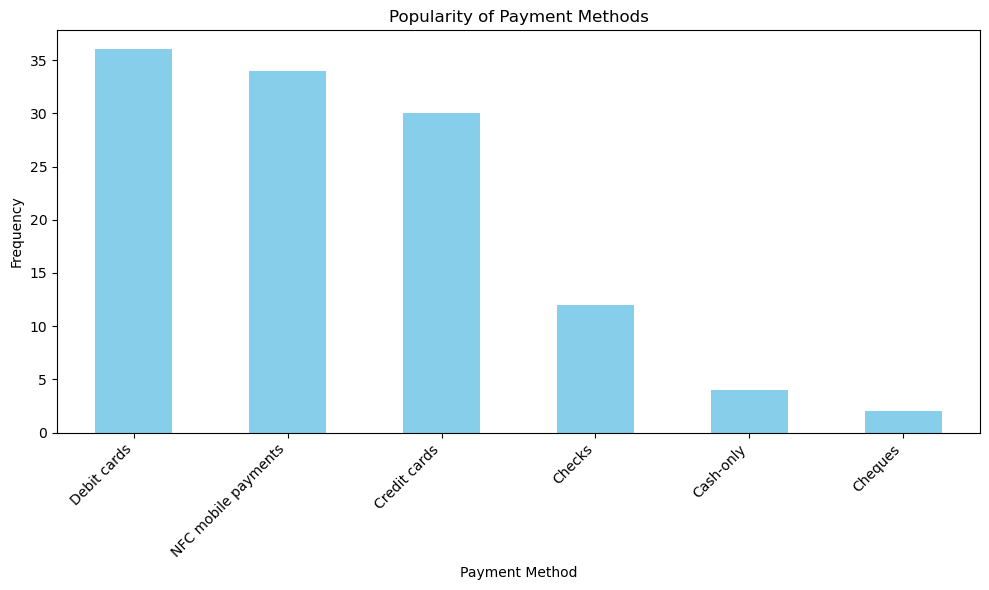

In [17]:
# Function to extract the payment method
def parse_payment_methods(misc):
    """
    Description: This function extracts the payment methods from the provided 'misc' field, which is expected to be a dictionary.
                 The function specifically looks for a key named 'Payments' within the dictionary and returns its associated value.
                 If the 'Payments' key is not present or the 'misc' field is not a dictionary, an empty list is returned.
    Arguments: misc : dict
               A dictionary containing various pieces of metadata. It may include a 'Payments' key that holds a list of payment methods.
               If 'misc' is not a dictionary or does not contain the 'Payments' key, the function returns an empty list.
    Returns:   list
               A list of payment methods if the 'Payments' key exists in the 'misc' dictionary.
               Otherwise, returns an empty list.
    """
    if isinstance(misc, dict):
        return misc.get('Payments', [])
    return []

# Extract payment methods and flatten the list
merged_df['payment_methods'] = merged_df['MISC'].apply(parse_payment_methods)
available_payment_methods = [method for sublist in merged_df['payment_methods'] for method in sublist]

# Count the frequency of each payment method
payment_method_frequencies = Counter(available_payment_methods)

# Convert payment method counts to a DataFrame for plotting
payment_method_df = pd.DataFrame(payment_method_frequencies.items(), columns=['Payment Method', 'Count'])

# Plot the frequency of payment methods as a bar chart
payment_method_df.sort_values('Count', ascending=False).plot(kind='bar', x='Payment Method', y='Count', color='skyblue', legend=False, figsize=(10, 6))
plt.title('Popularity of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The parse_payment_methods function is designed to extract payment method information from the MISC field, which is a dictionary that may contain various metadata about a business. If the MISC field contains a Payments key, the corresponding payment methods are extracted; otherwise, an empty list is returned. After extracting the payment methods for each business, the code flattens the list of methods into a single collection, making it easier to count the frequency of each method. The Counter class from the collections module is used to tally the occurrences of each payment method. The bar chart visualizes the popularity of different payment methods, allowing businesses to understand which payment options are most common among their peers.

## Explode Payment Methods and Categories for Detailed Analysis

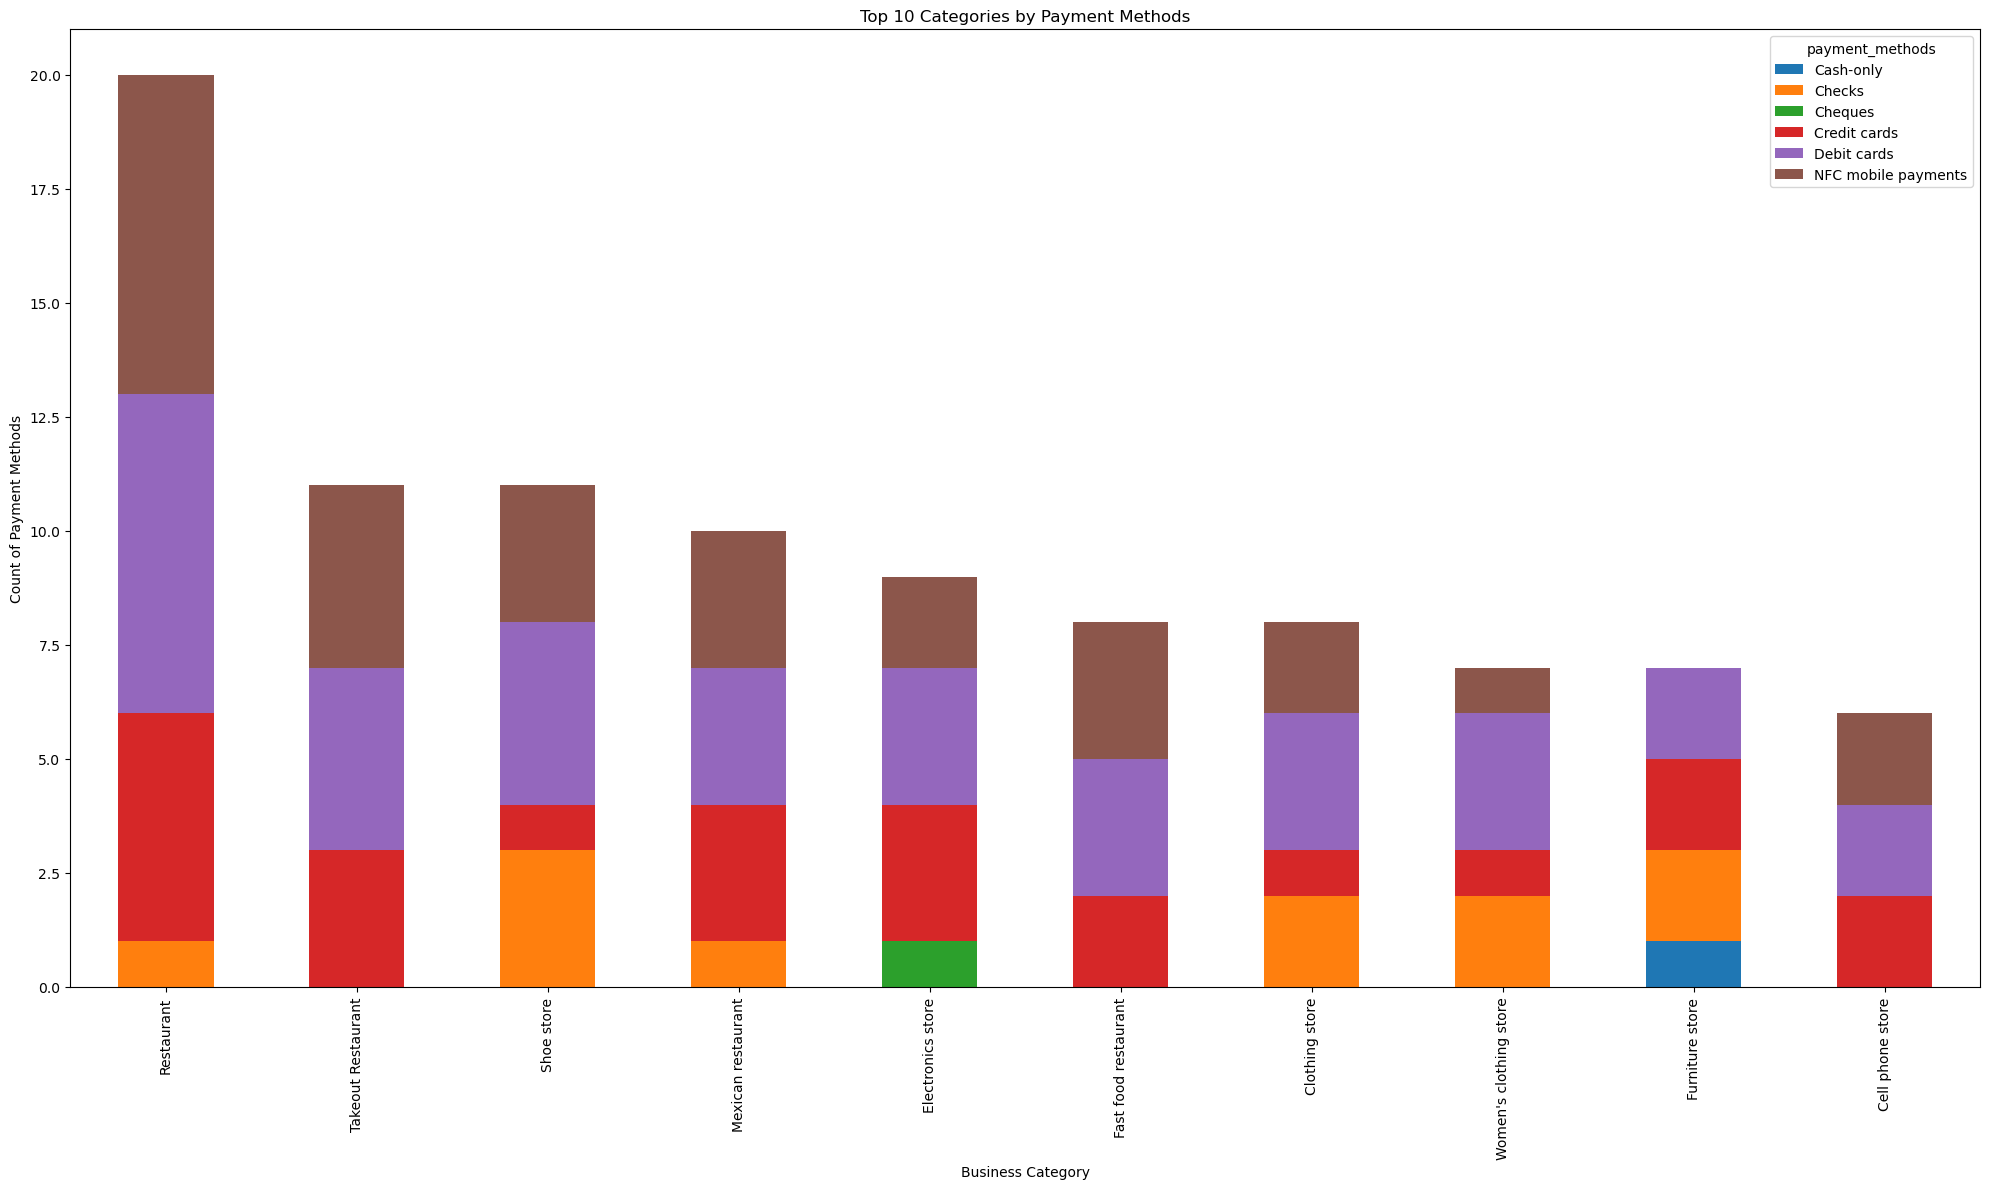

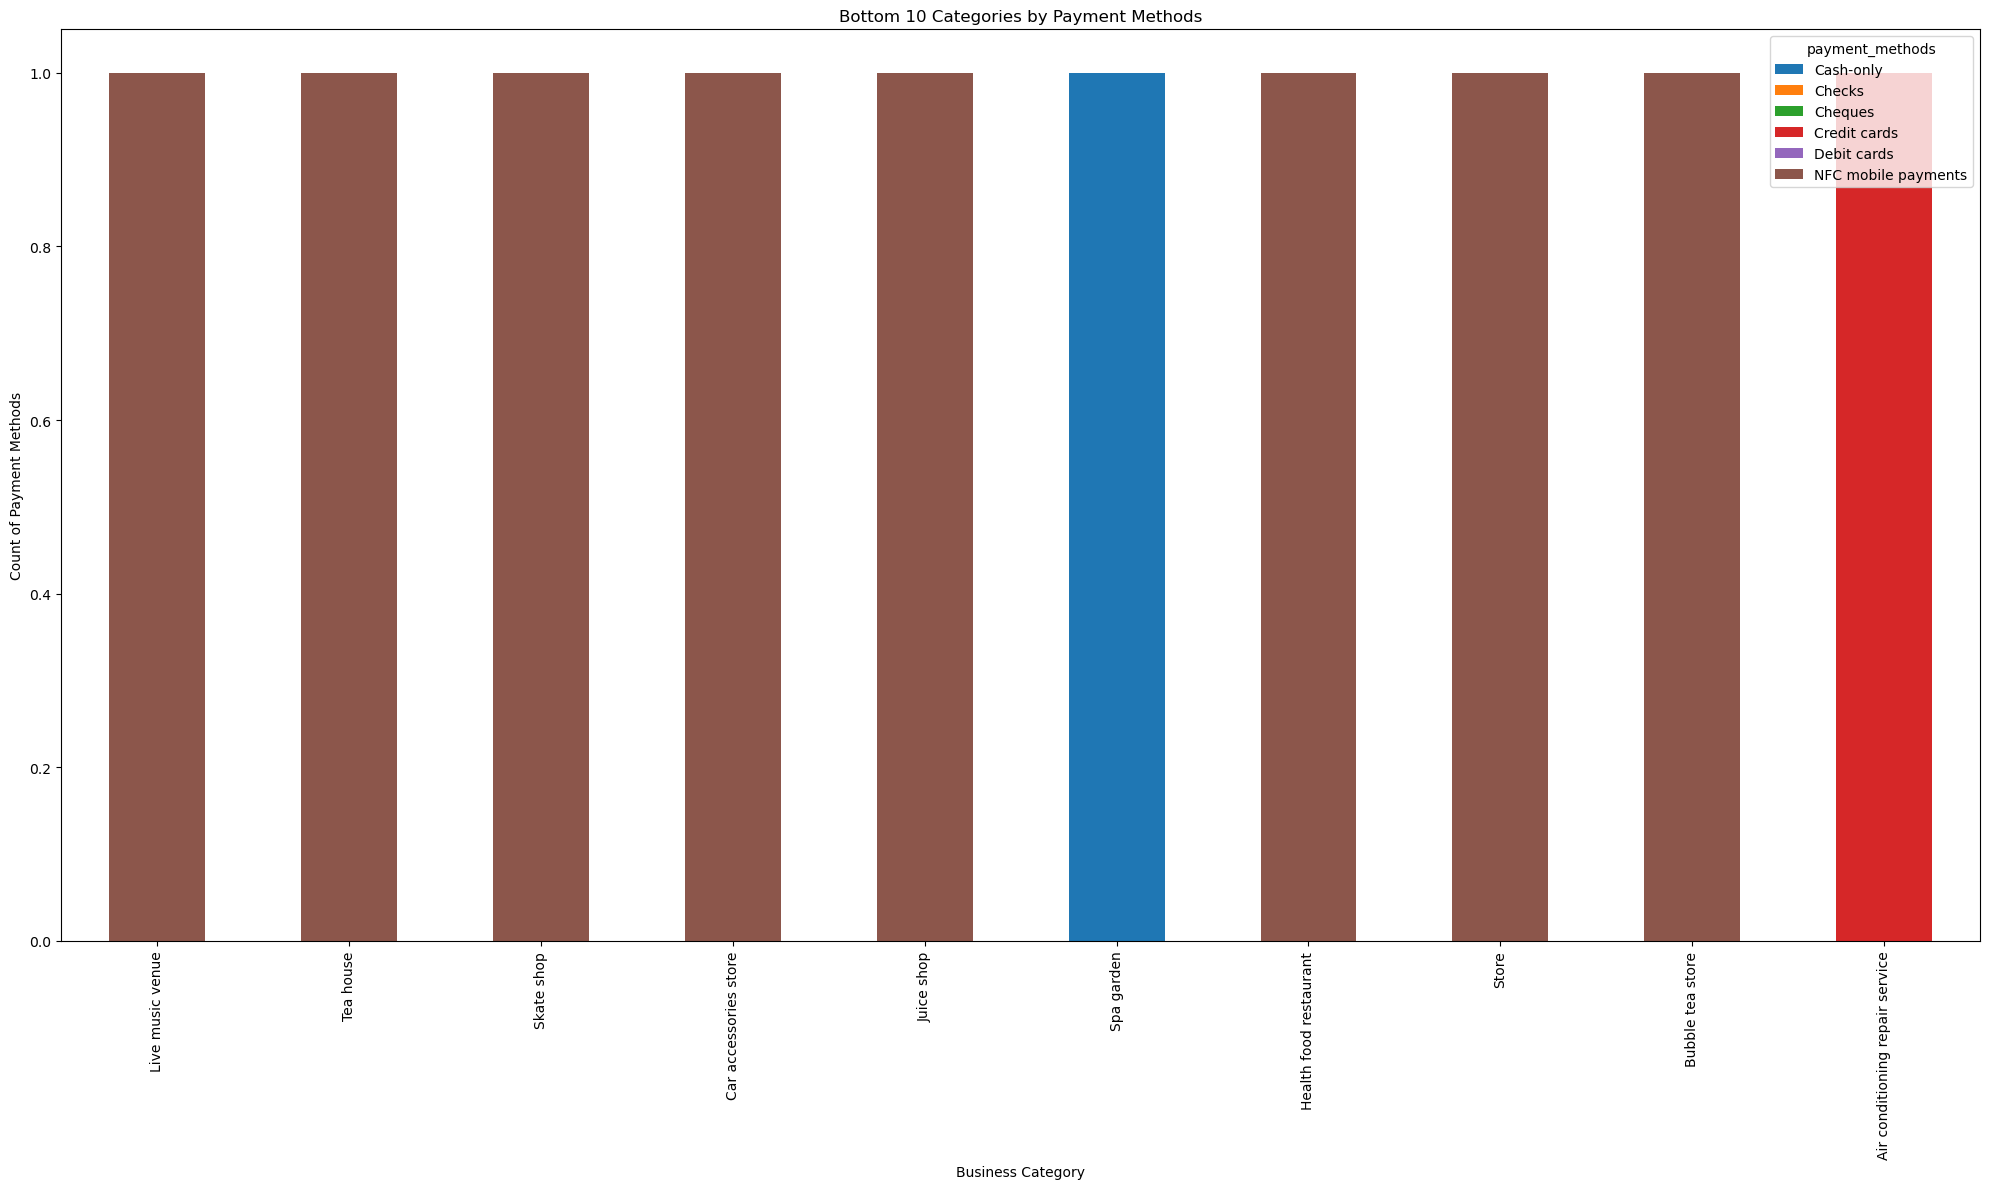

In [18]:
# Explode both payment methods and categories into individual rows for analysis
payment_category_df = merged_df.explode('payment_methods')
payment_category_df = payment_category_df.explode('category')

# Group by category and payment methods, and calculate the size (count) of each group
category_payment_counts = payment_category_df.groupby(['category', 'payment_methods']).size().unstack(fill_value=0)

# Calculate the total count of payment methods for each category
total_counts = category_payment_counts.sum(axis=1)

# Sort the categories by total count
sorted_categories = total_counts.sort_values(ascending=False)

# Select the top 10 and bottom 10 categories based on payment method counts
selected_categories = pd.concat([sorted_categories.head(10), sorted_categories.tail(10)])

# Filter the original data to include only the selected categories
filtered_category_payment_counts = category_payment_counts.loc[selected_categories.index]

# Plot top 10 categories with stacked bar charts
top10_group = filtered_category_payment_counts.head(10)
top10_group.plot(kind='bar', stacked=True, figsize=(20, 12))
plt.title('Top 10 Categories by Payment Methods')
plt.xlabel('Business Category')
plt.ylabel('Count of Payment Methods')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot bottom 10 categories with stacked bar charts
bottom10_group = filtered_category_payment_counts.tail(10)
bottom10_group.plot(kind='bar', stacked=True, figsize=(20, 12))
plt.title('Bottom 10 Categories by Payment Methods')
plt.xlabel('Business Category')
plt.ylabel('Count of Payment Methods')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In this final part of the analysis, the focus is on understanding how payment methods are distributed across different types of businesses. The code first breaks down the categories and payment methods into individual rows, making it easier to analyze them in detail. By grouping the data, it identifies how often each payment method is used within each business category. The analysis then highlights the most and least common categories, presenting the results in clear bar charts. This approach helps to see which payment options are most popular in specific types of businesses, providing useful insights for making informed decisions about which payment methods to offer, ensuring they meet customer needs effectively.

### Insights about top and bottom 10 business categories with versatile payment options

1. Diverse Payment Methods in Popular Categories: Popular categories like "Restaurant" and "Takeout Restaurant" offer the most diverse payment methods, including cash, cards, and mobile payments, to cater to a wide range of customers.

2. Limited Payment Options in Niche Categories: Categories like "Live music venue" and "Tea house" mostly rely on cash or a single payment method. Expanding these options could attract more customers who prefer digital payments.

3. Need for More Payment Methods in Specialized Services: Specialized businesses like "Spa garden" and "Air conditioning repair service" have limited payment options. Adding more payment methods could help these businesses reach more customers.

The analysis of payment methods across various business categories highlights the importance of providing diverse payment options, particularly in highly frequented business types. Businesses with limited payment methods may benefit from adopting a broader range of options to cater to evolving customer preferences, potentially increasing customer satisfaction and engagement.

<div class="alert alert-block alert-success"> 

## References <a class="anchor" name="Ref"></a>

* Stack Overflow. (2011, June 2). How do I use matplotlib autopct? https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
* Python Software Foundation. (n.d.). collections — Container datatypes. Python Documentation. https://docs.python.org/3/library/collections.html#collections.Counter

## Acknowledgement
* We acknowledge the assistance of ChatGPT, powered by OpenAI, in completing certain parts of this assignment. The use of this AI tool provided valuable support in areas such as   regex patterns, text preprocessing, and enhancing the overall quality of the work. 
OpenAI. (2023). ChatGPT (GPT-4). https://openai.com/chatgpt


</div>